# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Alfito Putra Fajar Pratama
- **Email:** alfitoputra567@gmail.com
- **ID Dicoding:** alfitoptr

## Menentukan Pertanyaan Bisnis

- Bagaimana tren pendapatan seiring waktu?
- Produk dan kategori produk mana yang memberikan pendapatan terbesar?
- Bagaimana feedback yang diberikan?
- Bagaimana strategi pembayaran tertentu memengaruhi pendapatan, dan apakah kita perlu fokus pada metode pembayaran tertentu?

## Import Semua Packages/Library yang Digunakan

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import datetime as dt

import plotly.express as px

## Data Wrangling

### Gathering Data

In [2]:
# Load datasets
customer_df = pd.read_csv('data/customers_dataset.csv')
geo_df = pd.read_csv('data/geolocation_dataset.csv')
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
orders_df = pd.read_csv('data/orders_dataset.csv')
product_cat_df = pd.read_csv('data/product_category_name_translation.csv')
products_df = pd.read_csv('data/products_dataset.csv')
seller_df = pd.read_csv('data/sellers_dataset.csv')

sembilan set data dimuat menggunakan pd.read_csv, masing-masing mewakili aspek kunci dari ekosistem e-commerce (misalnya, pesanan, barang, pelanggan, pembayaran, ulasan, produk, dan terjemahan kategori).

In [3]:
# Merging data for revenue calculations
order_items_with_timestamp = order_items_df.merge(
    orders_df[['order_id', 'order_purchase_timestamp']],
    on='order_id',
    how='left'
).dropna(subset=['order_purchase_timestamp'])

# Merging product category translations
products_df = pd.merge(products_df, product_cat_df, on='product_category_name')

1. Menggabungkan Order Items  dan Timestamps
    - Tindakan: Order_items_df digabungkan dengan orders_df menggunakan kunci order_id untuk menghasilkan stempel waktu pembelian.
    - Pemahaman: 
        - Penggabungan ini menghubungkan stempel waktu pembelian tingkat pesanan dengan masing-masing item pesanan, sehingga memungkinkan analisis deret waktu tren pendapatan.
        - Langkah dropna(subset=['order_purchase_timestamp']) memastikan kebersihan data dengan menghapus entri yang tidak memiliki stempel waktu, yang sangat penting untuk analisis kronologis.
        - Memastikan granularitas analisis pada tingkat item (bukan hanya pesanan), sehingga memungkinkan wawasan yang lebih dalam ke dalam tren tingkat item.
2. Menggabungkan Product Data dengan Category Translations
    - Tindakan: Produk_df digabungkan dengan kategori_translasi_df pada nama_kategori_produk untuk menerjemahkan kategori produk ke dalam format yang dapat dibaca.
    - Pemahaman:
        - Terjemahan ini meningkatkan kemampuan interpretasi dengan mengganti nama kategori teknis atau non-standar dengan padanan bahasa Inggris yang lebih ramah pengguna.
        - Memastikan konsistensi nama kategori di seluruh analisis, menghindari kebingungan yang disebabkan oleh penamaan yang tidak diterjemahkan atau tidak konsisten.

In [4]:
order_items_with_timestamp

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value order_purchase_timestamp  
0       2017-09-19 09:45:35   58.90          13.29      2017-09-13 08:59:02  
1       2017-05-03 11:05:13  239.90          19.93      2017-04-26 10:53:06  
2       2018-01-18 14:48:30  199.00          17.87      2018-01-14 14:33:31  
3       2018-08-15 10:10:18   12.99          12.79      2018-08-08 10:00:35  
4       2017-02-13 13:57:51  199.90          18.14      2017-02-04 13:57:51  
...                     ...     ...            ...                      ...  
112645  2018-05-02 04:11:01  299.99          43.41      2018-04-23 13:57:06  
112646  2018-07-20 04:31:48  350.00          36.53      2018-07-14 10:26:46  
112647  2017-10-30 17:14:25   99.90          16.95      2017-10-23 17:07:56  
112648  2017-08-21 00:04:32   55.99           8.72      2017-08-14 23:02:59  
112649  2018-06-12 17:10:13   43.00          12.79      2018-06-09 17:00:18  

[112650 rows x 8 columns]

In [5]:
products_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

  product_category_name_english  
0                     perfumery  
1                           art  
2                sports_leisure  
3                          baby  
4                    housewares

### Assessing Data

In [ ]:
dataframes = [
    ('Order Items', order_items_df),
    ('Order Items with Timestamp', order_items_with_timestamp),
    ('Orders', orders_df),
    ('Customers', customer_df),
    ('Order Payments', order_payments_df),
    ('Order Reviews', order_reviews_df),
    ('Products', products_df),
    ('Product Categories', product_cat_df),
]

missing_values = {name: df.isnull().sum().any() for name, df in dataframes}

for name, has_missing in missing_values.items():
    print(f"{name}: {'Missing values found' if has_missing else 'No missing values'}")

Order Items: No missing values
Order Items with Timestamp: No missing values
Orders: Missing values found
Customers: No missing values
Order Payments: No missing values
Order Reviews: Missing values found
Products: Missing values found
Product Categories: No missing values


- *Code* diaatas bertujuan untuk menampilkan apakah terdapat missing value dari setiap data yang ada
- Didapat data Orders, Order Reviews dan Products memiliki missing value

In [36]:
duplicated_data = {name: df.duplicated().sum().any() for name, df in dataframes}

for name, has_duplicate in duplicated_data.items():
    print(f"{name}: {'Duplicated data found' if has_duplicate else 'No duplicated data '}")

Order Items: No duplicated data 
Order Items with Timestamp: No duplicated data 
Orders: No duplicated data 
Customers: No duplicated data 
Order Payments: No duplicated data 
Order Reviews: No duplicated data 
Products: No duplicated data 
Product Categories: No duplicated data 


- *Code* diaatas bertujuan untuk menampilkan apakah terdapat dupllikasi data dari setiap data yang ada
- Hasil menunjukan tidak terdapat duplikasi data dari setiap data yang ada

In [11]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- *Code* diaatas bertujuan untuk menampilkan missing value dari data orders_df
- Dataset ini memiliki missing value pada beberapa variabel berikut:  
    - `order_approved_at`: sebanyak **160 data**.  
    - `order_delivered_carrier_date`: sebanyak **1.783 data**.  
    - `order_delivered_customer_date`: sebanyak **2.965 data**.  
- Missing value pada variabel ini kemungkinan disebabkan oleh transaksi yang belum selesai diproses atau data yang tidak lengkap pada tahap tertentu dalam alur pengiriman.

In [12]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

- *Code* diaatas bertujuan untuk menampilkan missing value dari data order_reviews_df
- Dataset ini memiliki missing value pada variabel berikut:  
    - `review_comment_title`: sebanyak **87.656 data**.  
    - `review_comment_message`: sebanyak **58.247 data**.  
- Missing value pada variabel ini dapat terjadi karena pelanggan tidak memberikan komentar atau ulasan tambahan setelah menyelesaikan pesanan.

In [13]:
products_df.isnull().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

- *Code* diaatas bertujuan untuk menampilkan missing value dari data products_df
- Dataset ini memiliki missing value pada variabel berikut:  
    - `product_weight_g`: sebanyak **1 data**.  
    - `product_length_cm`: sebanyak **1 data**.  
    - `product_height_cm`: sebanyak **1 data**.  
    - `product_width_cm`: sebanyak **1 data**.  
- Missing value pada variabel ini kemungkinan besar berasal dari entri produk yang tidak lengkap dalam sistem inventaris.

In [14]:
# Checking data types
order_items_with_timestamp.dtypes

order_id                     object
order_item_id                 int64
product_id                   object
seller_id                    object
shipping_limit_date          object
price                       float64
freight_value               float64
order_purchase_timestamp     object
dtype: object

*Code* diatas menampilkan tipe data dari tiap variabell yang ada pada order_items_with_timestamp

In [15]:
orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

*Code* diatas menampilkan tipe data dari tiap variabell yang ada pada orders_df

In [16]:
customer_df.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

*Code* diatas menampilkan tipe data dari tiap variabell yang ada pada customer_df

In [17]:
order_payments_df.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

*Code* diatas menampilkan tipe data dari tiap variabell yang ada pada order_payments_df

In [18]:
order_reviews_df.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

*Code* diatas menampilkan tipe data dari tiap variabell yang ada pada order_reviews_df

In [19]:
products_df.dtypes

product_id                        object
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
product_category_name_english     object
dtype: object

*Code* diatas menampilkan tipe data dari tiap variabell yang ada pada products_df

In [20]:
product_cat_df.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

*Code* diatas menampilkan tipe data dari tiap variabell yang ada pada product_cat_df

**Insight**

Sebagai bagian dari proses Assessing Data, dilakukan pemeriksaan terhadap **missing value**, **duplikasi data** dan **tipe data** pada dataset. Hasil pemeriksaan menunjukkan adanya data yang mengandung missing value pada tiga dataset, yaitu `orders_df`, `order_reviews_df`, dan `products_df`.

Secara umum, variabel-variabel dalam dataset sudah memiliki tipe data yang sesuai dengan konteksnya. Namun, terdapat pengecualian pada variabel waktu (seperti `order_purchase_timestamp` dan variabel waktu sejenis lainnya), yang masih memiliki tipe data **object**. Perubahan tipe data ini perlu dilakukan agar analisis waktu dapat dilakukan dengan lebih optimal.


### Cleaning Data

In [13]:
# Converting timestamp columns to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

order_items_with_timestamp['order_purchase_timestamp'] = pd.to_datetime(order_items_with_timestamp['order_purchase_timestamp'])

*Code* diatas mengubah tipe kolom 'order_purchase_timestamp' pada orders_df dan order_items_with_timestamp kedalam tipe datetime

In [22]:
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [23]:
order_items_with_timestamp.dtypes

order_id                            object
order_item_id                        int64
product_id                          object
seller_id                           object
shipping_limit_date                 object
price                              float64
freight_value                      float64
order_purchase_timestamp    datetime64[ns]
dtype: object

**Insight:**
-  Kolom order_purchase_timestamp pada kolom order_df dan order_items_with_timestamp dikonversi ke format datetime menggunakan pd.to_datetime.
- Memastikan penanganan waktu yang tepat untuk operasi berbasis waktu seperti pemfilteran, pengelompokan, dan analisis tren

## Exploratory Data Analysis (EDA)

### Revenue Distribution

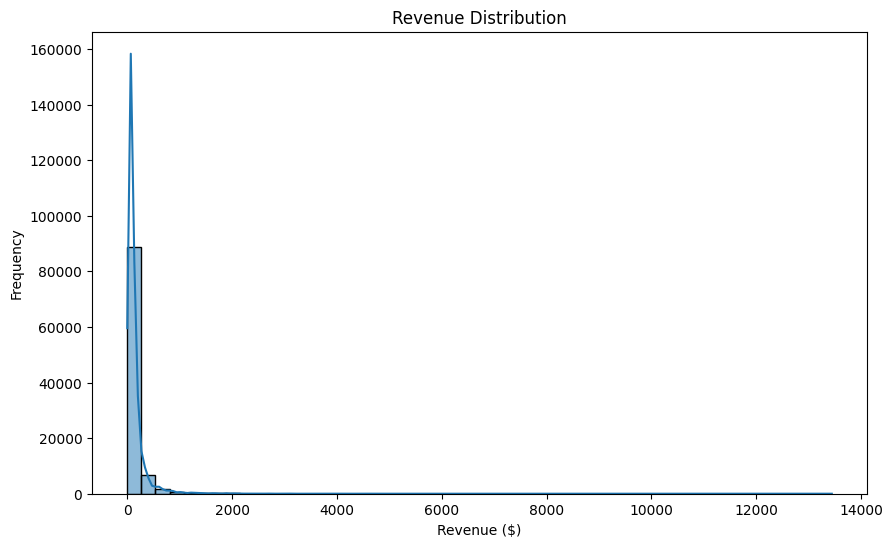

In [24]:
# Group by order to calculate total revenue
revenue_by_order = order_items_with_timestamp.groupby('order_id')['price'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(revenue_by_order['price'], bins=50, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue ($)")
plt.ylabel("Frequency")
plt.show()

*Code* diatas mevisualisasikan distribusi pendapatan dengan mengelompokan pendapatan tiap order menggunakan `groupby`

**Insight:**
- Distribusi pendapatan sangat condong ke kanan, menunjukkan bahwa sebagian besar transaksi menghasilkan pendapatan yang relatif rendah, sementara sejumlah kecil transaksi menghasilkan pendapatan yang sangat tinggi (outlier).
- Mayoritas transaksi yang signifikan berada dalam kisaran pendapatan yang lebih rendah (mendekati $0-$500). Hal ini menunjukkan bahwa transaksi yang lebih kecil mendominasi platform e-commerce.
- Ekor panjang yang memanjang ke arah nilai pendapatan yang lebih tinggi (hingga $14.000) menunjukkan pesanan besar, mungkin bernilai tinggi atau pembelian dalam jumlah besar.
- Saran strategi pemasaran dapat menargetkan peningkatan jumlah transaksi bernilai tinggi atau mendorong peningkatan penjualan ke pelanggan bernilai rendah.

### Order Insight

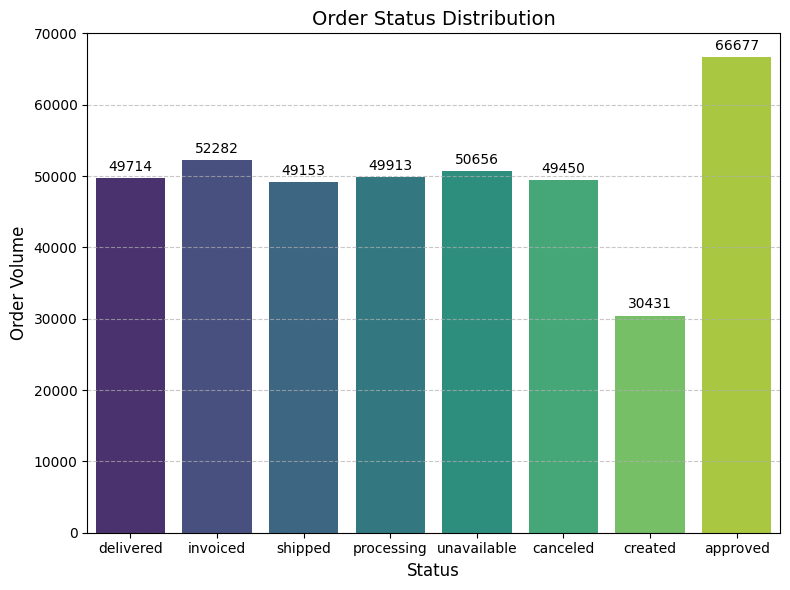

In [24]:
plt.figure(figsize=(8, 6))

# Membuat barplot
barplot = sns.barplot(
    data=orders_df, 
    x='order_status', 
    y=orders_df.index, 
    palette='viridis', 
    errorbar=('ci', 0), 
    hue='order_status'
)

# Menambahkan data label di atas batang
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Menambahkan elemen visual lainnya
plt.title("Order Status Distribution", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Order Volume", fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan visualisasi
plt.tight_layout()
plt.show()

*Code* diatas mevisualisasikan distribusi status pesanan

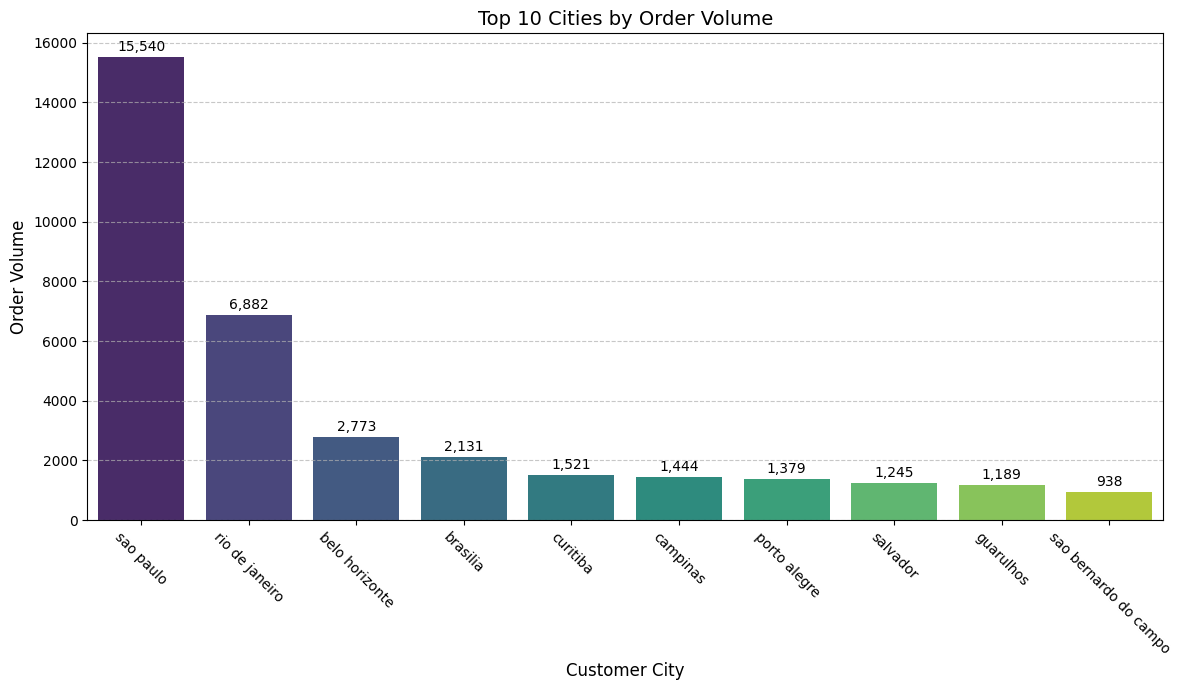

In [11]:
top_cities = customer_df['customer_city'].value_counts().head(10).reset_index()
top_cities.columns = ['customer_city', 'count']

plt.figure(figsize=(12, 7))
sns.barplot(x='customer_city', y='count', data=top_cities, 
            hue='customer_city', legend=False, palette='viridis')

for index, row in top_cities.iterrows():
    plt.text(index, row['count'] + 200, f"{row['count']:,}", color='black', ha="center", fontsize=10)

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize=10)
plt.title("Top 10 Cities by Order Volume", fontsize=14)
plt.xticks(rotation=315, fontsize=10)
plt.ylabel('Order Volume', fontsize=12)
plt.xlabel('Customer City', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

*Code* diatas mevisualisasikan distribusi volume pesanan tiap kota dengan menghitung jumlah data tiap kelas menggunakan `value_counts()`

**Insight:**
- Visualisasi ini menggambarkan distribusi berbagai status pesanan seperti *delivered*, *invoiced*, *shipped*, *processing*, unavailable, canceled, dan *created*.
- *created* memiliki jumlah tertinggi dibandingkan semua status lainnya, menunjukkan banyak pesanan yang telah dibuat tetapi belum melewati tahap selanjutnya. *delivered*, *invoiced*, *shipped*, *processing*, dan *unavailable* memiliki jumlah yang cukup merata. *canceled* memiliki jumlah yang lebih rendah dibandingkan status lain, menunjukkan tingkat pembatalan yang relatif kecil.
- Tingginya status *created* dapat mengindikasikan adanya pesanan yang mungkin tidak diproses lebih lanjut, atau pesanan baru yang belum dikonfirmasi. Distribusi yang cukup tinggi pada status seperti *delivered*, *shipped*, dan *processing* menunjukkan alur pemesanan yang sehat, di mana pesanan bergerak ke tahap penyelesaian. Jumlah pesanan yang *canceled* atau unavailable bisa menjadi fokus untuk analisis lebih lanjut guna memahami alasan pelanggan membatalkan pesanan atau ketidaktersediaan produk.

In [ ]:
# Tambahkan kolom baru untuk hari dalam seminggu
orders_df['day_of_week'] = orders_df['order_purchase_timestamp'].dt.dayofweek

# Hitung jumlah pesanan per hari (opsional)
orders_perday = orders_df.groupby('day_of_week').size().reset_index(name='order_quantity')
orders_perday

day_of_week  order_quantity
0            0           16196
1            1           15963
2            2           15552
3            3           14761
4            4           14122
5            5           10887
6            6           11960

*Code* diatas membuat data jumlah pesanan di masing masing hari dalam seminggu dengan mengekstrak hari dari kolom `order_purchase_timestamp` menjadi kolom `day_of_week`, lalu menghitung jumlah pesanan dengan mengelompokan data terhadap masing masing hari menggunakan `groupby`

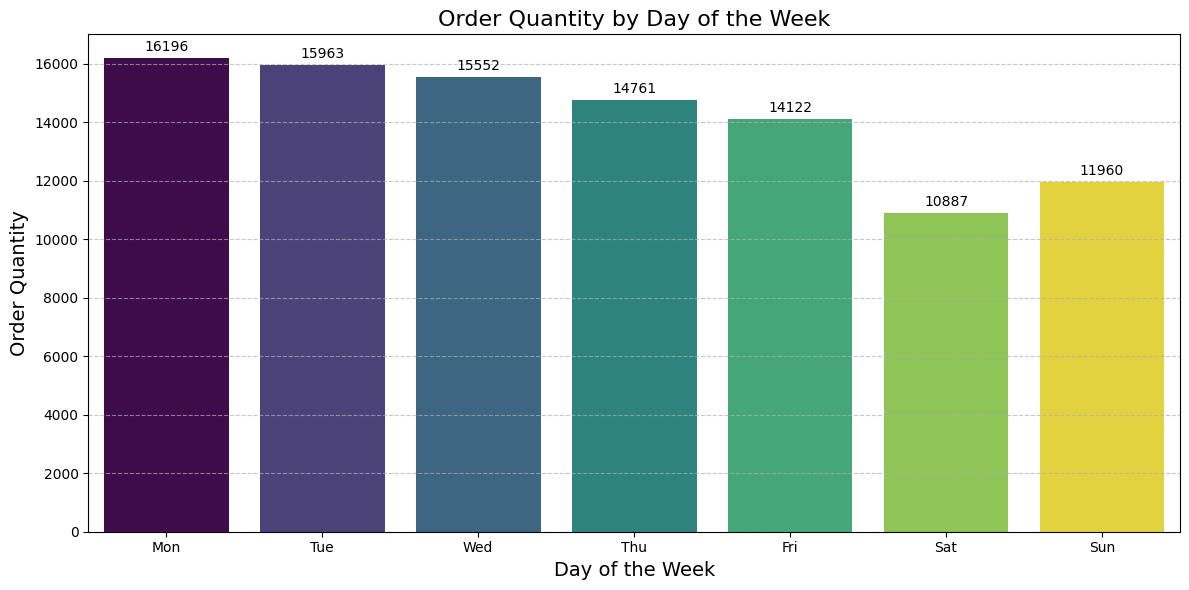

In [15]:
plt.figure(figsize=(12, 6))

barplot = sns.barplot(
    data=orders_perday, 
    x='day_of_week', 
    y='order_quantity', 
    palette='viridis', 
    errorbar=('ci', 0), 
    hue='day_of_week',
    legend=False
)

for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.title('Order Quantity by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Order Quantity', fontsize=14)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Code* diatas mevisualisasikan perbandingan jumlah pesanan dalam masing masing hari

**Insight:**
- Visualisasi ini menggambarkan  jumlah pesanan berdasarkan hari dalam minggu. 
- Jumlah pesanan cenderung lebih tinggi di awal minggu (Senin) dan menurun sepanjang minggu hingga mencapai titik terendah pada hari Saptu. Namun, pada hari Minggu, jumlah pesanan sedikit meningkat kembali.

### Payment Insigts

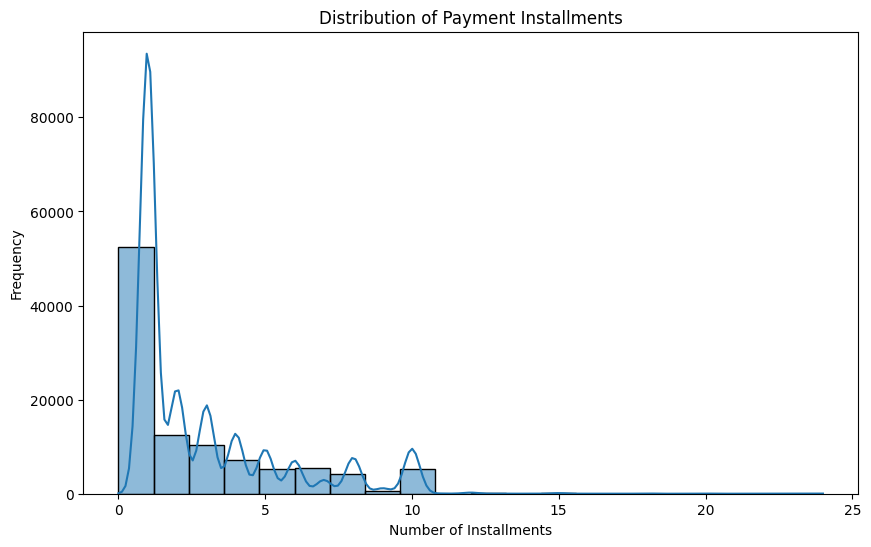

In [16]:
# Distribution of Payment Installments
plt.figure(figsize=(10, 6))
sns.histplot(order_payments_df['payment_installments'], bins=20, kde=True)
plt.title("Distribution of Payment Installments")
plt.xlabel("Number of Installments")
plt.ylabel("Frequency")
plt.show()

*Code* diatas mevisualisasikan distribusi jumlah pembayaran pesanan

**Insight:**
- Distribusi jumlah pembayaran pesanan sangat condong ke kanan, mayoritas pelanggan melakukan pembayaan berada dalam kisaran rendah (1-10 kali pembayaran). Hal ini menunjukkan bahwa pelanggan cederung melakukan pembelian menggunakan metode pembayan cicilan. Ekor panjang yang memanjang ke arah nilai jumlah pembayaran yang lebih tinggi (hingga 25 kali pembayaan) menunjukkan terdapat data pesanan besar, mungkin bernilai tinggi atau pembelian dalam jumlah besar.


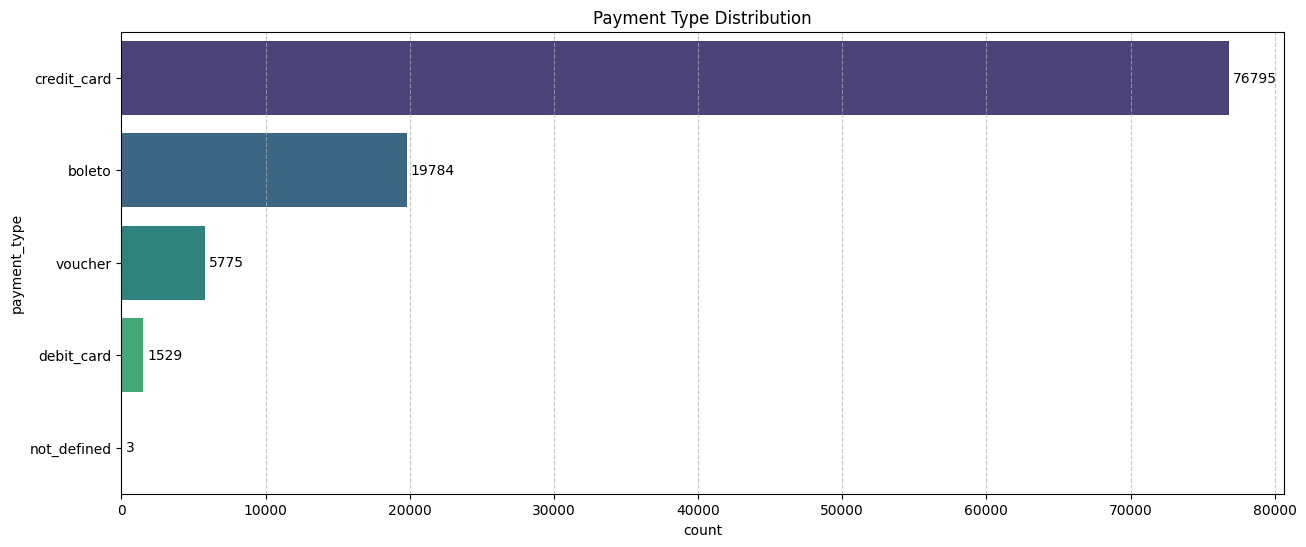

In [17]:
# Example: Payment Type Distribution
plt.figure(figsize=(15, 6))
countplot = sns.countplot(data=order_payments_df, y='payment_type', hue='payment_type', palette='viridis')
for container in countplot.containers:
    countplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title("Payment Type Distribution")
plt.show()

*Code* diatasjumlah tipe pembayaran pesanan.

**Insight:**
- Mayoritas pembayaran dilakukan dengan kredit, lalu disusul dengan tipe boleto, voucher dan debit_card

### Customer Insight

In [18]:
order_freq = orders_df.groupby('customer_id').agg({
    'order_id': 'count',  # Frequency
}).reset_index()
order_freq.columns = ['customer_id', 'count_order']
order_freq['count_order'].value_counts()

count_order
1    99441
Name: count, dtype: int64

*Code* diatas mendapatkan jumlah pemesanan pelanggan dengan mengelompokan customer_id terhadap order_id dengan `groupby`

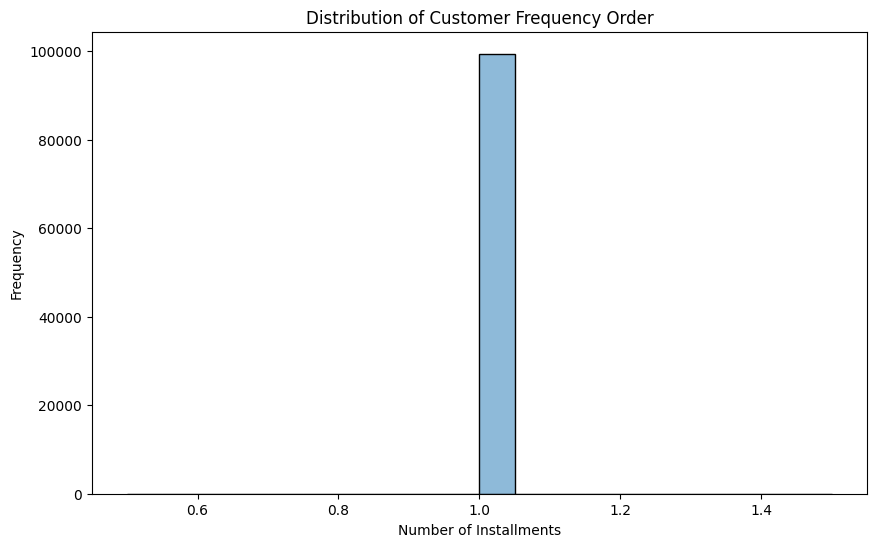

In [19]:
# Distribution of Customer Frequency
plt.figure(figsize=(10, 6))
sns.histplot(order_freq['count_order'], bins=20, kde=True)
plt.title("Distribution of Customer Frequency Order")
plt.xlabel("Number of Installments")
plt.ylabel("Frequency")
plt.show()

*Code* diatas mevisualisasikan histogram frekuensi jumlah pemesanan pelanggan

**Insight:**
- Berdasarkan distribusi ini, tampaknya semua pelanggan hanya melakukan satu kali pembelian (frekuensi pembelian pelanggan adalah 1)
- Tidak adanya variasi pada distribusi frekuensi ini menunjukkan bahwa tidak ada pelanggan yang melakukan pembelian berulang (repeat orders). Ini bisa menjadi indikasi bahwa produk mungkin bersifat sekali beli (one-time purchase) atau kurangnya strategi untuk mendorong pelanggan kembali membeli.
- Hal ini dapat berdampak pada keberlanjutan bisnis karena mempertahankan pelanggan (customer retention) sering kali lebih efisien dibandingkan menarik pelanggan baru.
- Mungkin diperlukan strategi untuk meningkatkan loyalitas pelanggan, seperti program loyalitas, diskon untuk pembelian berikutnya, atau kampanye retensi lainnya untuk mendorong repeat purchases.

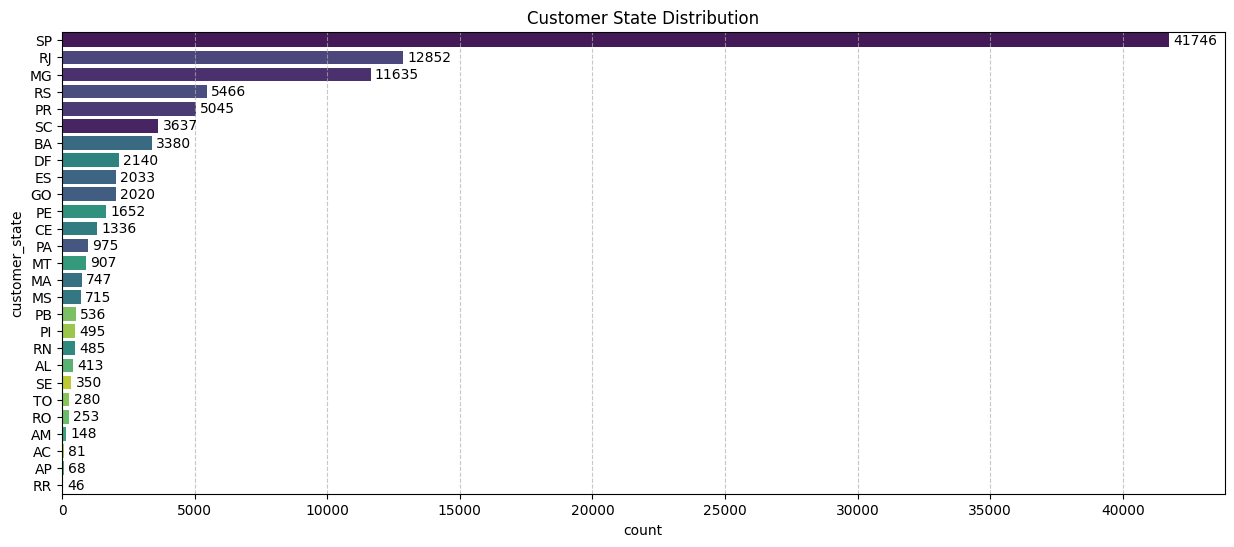

In [20]:
# Customer State Distribution
plt.figure(figsize=(15, 6))
countplot = sns.countplot(y=customer_df['customer_state'], 
                          order=customer_df['customer_state'].value_counts().index, 
                          palette='viridis',
                          hue=customer_df['customer_state'])
for container in countplot.containers:
    countplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title("Customer State Distribution")
plt.show()

*Code* diatas mevisualisasikan baplot jumlah pelanggan dari setiap negara bagian

**Insight:**
- Mayoritas pelanggan berasal dari negara bagian São Paulo (SP) dengan jumlah yang jauh lebih tinggi dibandingkan negara bagian lainnya, yaitu 41,746 pelanggan. Ini menunjukkan bahwa SP merupakan pasar utama bagi bisnis ini.
- Rio de Janeiro (RJ) dan Minas Gerais (MG) masing-masing berada di peringkat kedua dan ketiga dengan 12,852 dan 11,635 pelanggan. Ini menunjukkan pentingnya pasar di wilayah tenggara Brazil.
- Negara bagian di wilayah selatan seperti Rio Grande do Sul (RS), Paraná (PR), dan Santa Catarina (SC) juga menunjukkan kontribusi yang cukup signifikan, dengan jumlah pelanggan masing-masing 5,466, 5,045, dan 3,637.
- Di luar wilayah selatan dan tenggara, distribusi pelanggan lebih sedikit, dengan Brasília (DF) memiliki jumlah pelanggan yang lebih besar dibandingkan negara bagian lainnya di luar dua wilayah utama, yaitu 2,140 pelanggan.
- Negara bagian dengan jumlah pelanggan terendah adalah Roraima (RR) dengan hanya 46 pelanggan, diikuti oleh Amapá (AP) dengan 68 pelanggan dan Acre (AC) dengan 81 pelanggan. Hal ini bisa menjadi indikasi potensi pasar yang belum tergarap di wilayah utara dan barat Brazil.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren pendapatan seiring waktu?

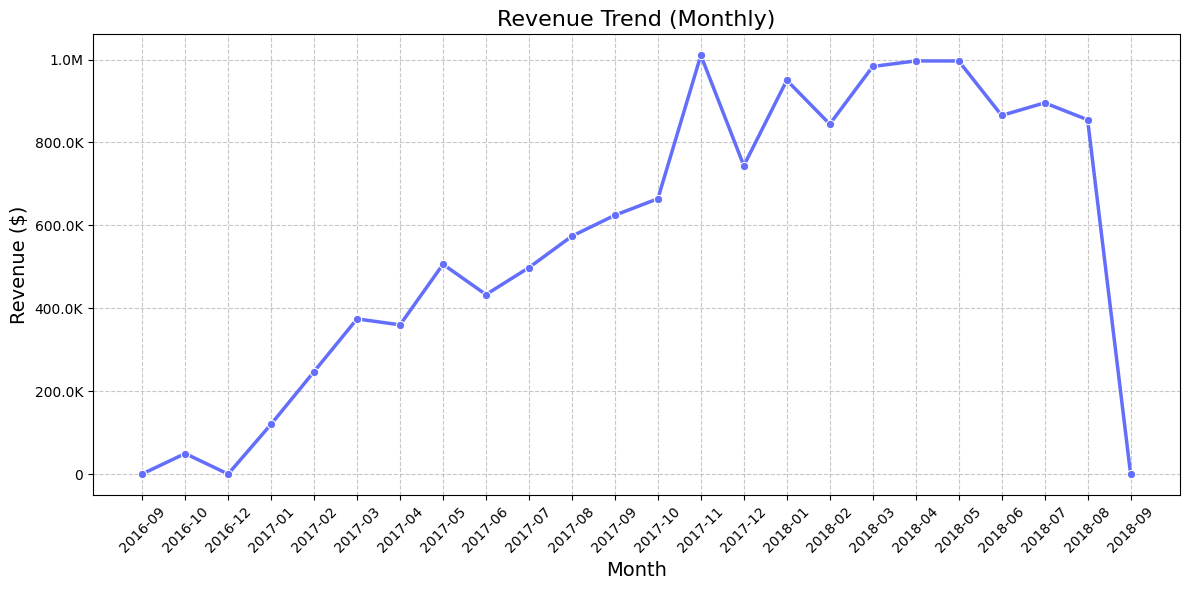

In [26]:
def format_yaxis(value, _):
    if value >= 1_000_000_000:
        return f'{value / 1_000_000_000:.1f}B'
    elif value >= 1_000_000:
        return f'{value / 1_000_000:.1f}M'
    elif value >= 1_000:
        return f'{value / 1_000:.1f}K'
    else:
        return f'{value:.0f}'

order_items_with_timestamp['Month'] = order_items_with_timestamp['order_purchase_timestamp'].dt.to_period('M')
revenue_trend = order_items_with_timestamp.groupby('Month')['price'].sum().reset_index()
revenue_trend['Month'] = revenue_trend['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_trend, x='Month', y='price', marker='o', color='#636EFA', linewidth=2.5)
plt.title('Revenue Trend (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Code* diatas mevisualisasikan total pendapatan setiap bulannya dengan mengekstrak bulan pemesanan lalu mengelompokan pesanan terhadap *price* pesanan sehingga mendapatkan total pendapatan.

**Insight**
- Tren Pertumbuhan Positif: Secara keseluruhan, terdapat tren peningkatan pendapatan dari bulan September 2016 hingga akhir tahun 2017. Hal ini menunjukkan adanya pertumbuhan bisnis yang konsisten selama periode tersebut.
- Puncak Pendapatan: Pendapatan mencapai puncaknya pada Oktober 2017, yang kemungkinan disebabkan oleh promosi, peluncuran produk baru, atau momen tertentu (seperti event musiman atau liburan).
- Setelah Oktober 2017, pendapatan mengalami fluktuasi, dengan beberapa bulan menunjukkan penurunan signifikan, tetapi masih berada pada tingkat yang relatif tinggi hingga awal tahun 2018.
- Pendapatan menunjukkan tren penurunan drastis setelah Agustus 2018. Hal ini mungkin dipengaruhi oleh faktor musiman, penurunan permintaan, atau perubahan strategi bisnis.

### Pertanyaan 2: Produk dan kategori produk mana yang memberikan pendapatan terbesar?

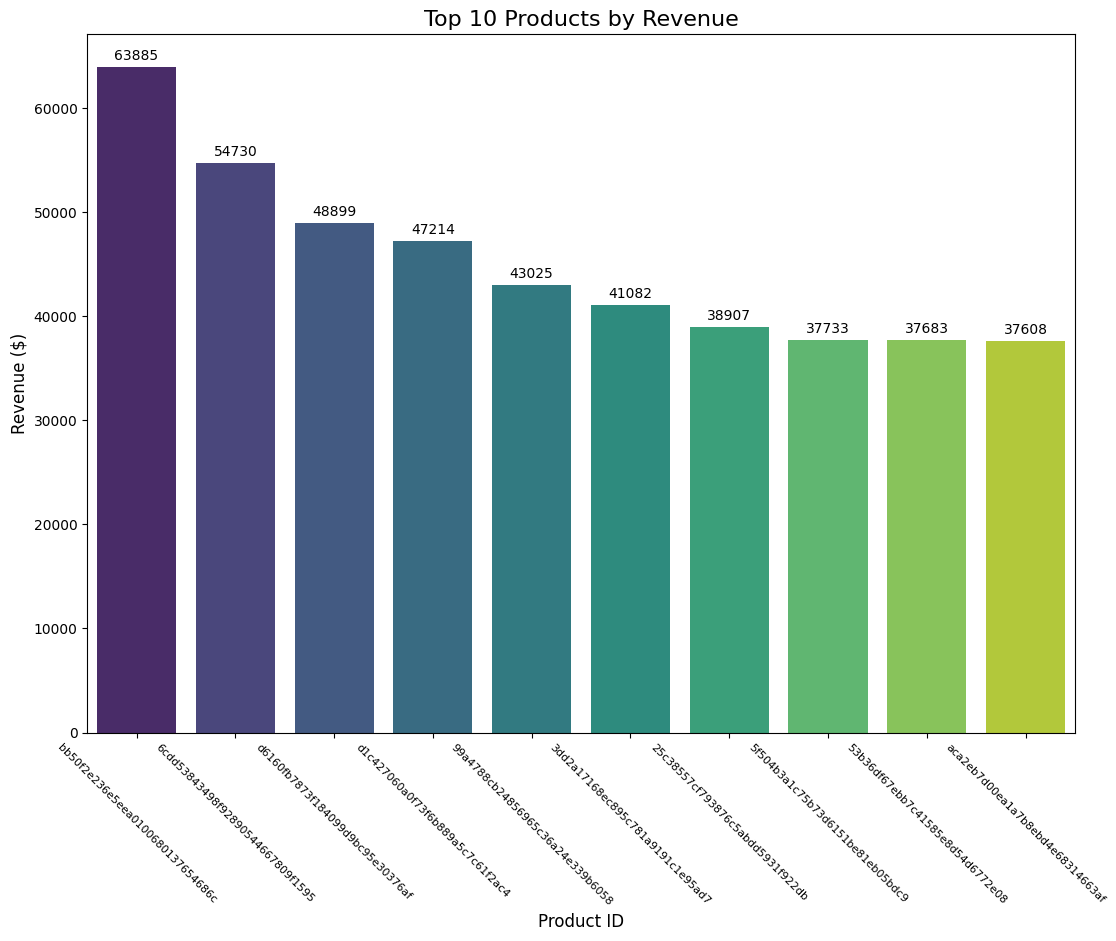

In [27]:
product_revenue = order_items_df.groupby("product_id")["price"].sum().reset_index()
product_revenue = product_revenue.merge(products_df, on="product_id")
top_products = product_revenue.nlargest(10, "price")

plt.figure(figsize=(12, 8))
bars = sns.barplot(data=top_products, x="product_id", y="price", 
                   palette="viridis", hue='product_id', legend=False)
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
for container in bars.containers:
    bars.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.tight_layout()
plt.xticks(rotation=315, fontsize=8)
plt.show()

*Code* diatas mevisualisasikan 10 produk teratas yang menghasilkan pendapatan tertinggi dengan mengelompokan `poduct_id` dengan `price` pembelian sehingga mendapatkan total pendapatan dari tiap produk

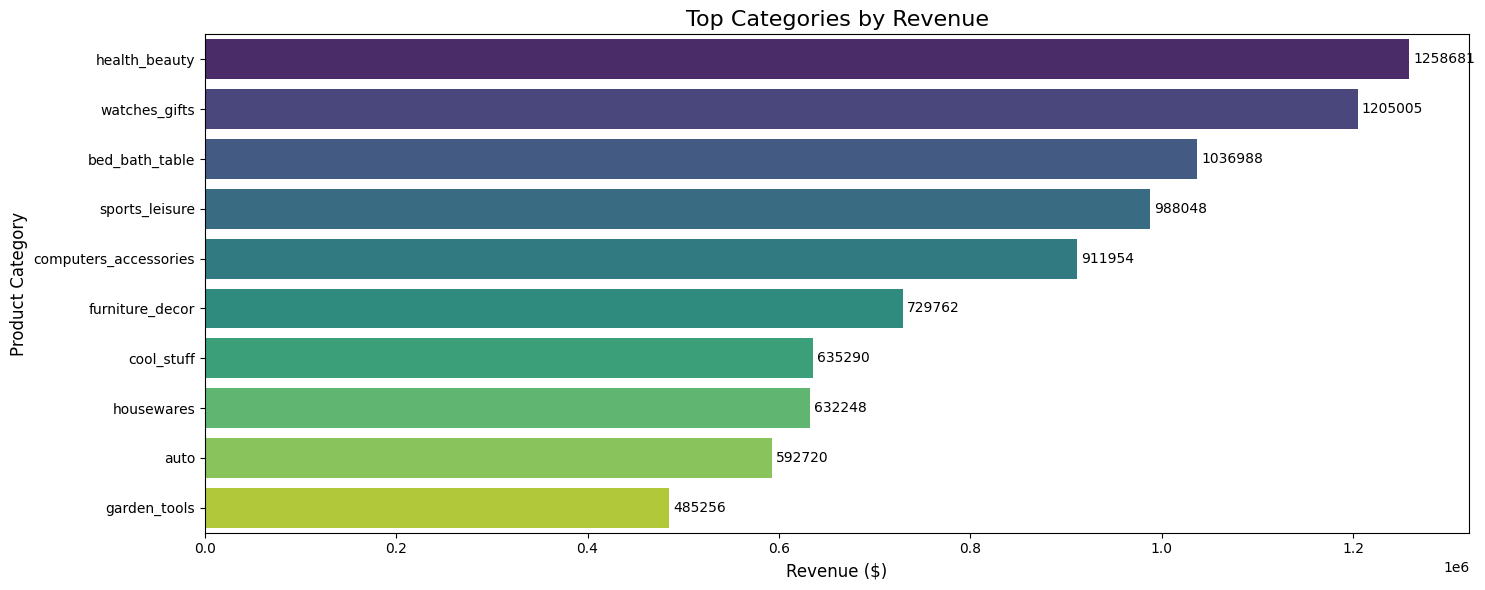

In [28]:
category_revenue = order_items_df.merge(products_df, on="product_id").groupby(
    "product_category_name_english")["price"].sum().reset_index()
top_categories = category_revenue.nlargest(10, "price")

plt.figure(figsize=(15, 6))
bars = sns.barplot(data=top_categories, y="product_category_name_english", x="price", 
                   palette="viridis", hue = 'product_category_name_english', legend=False)
plt.title("Top Categories by Revenue", fontsize=16)
plt.xlabel("Revenue ($)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
for container in bars.containers:
    bars.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.tight_layout()
plt.show()

*Code* diatas mevisualisasikan 10 kategori produk teratas yang menghasilkan pendapatan tertinggi dengan mengelompokan `poduct_id` dengan `product_category_name_english` pembelian sehingga mendapatkan total pendapatan dari kategori tiap produk

**Insight:**
- Produk yang memberikan nilai *revenue* tertinggi adalah pruduk dengan id bb50f2e236e5eea0100680137654686c, dengan total revenue 63885 dolar.
- Kategori produk yang memberikan nilai *revenue* tertinggi adalah kategori health_beauty dengan total revenue 1258681 dolar

### Pertanyaan 3: Bagaimana feedback yang diberikan?

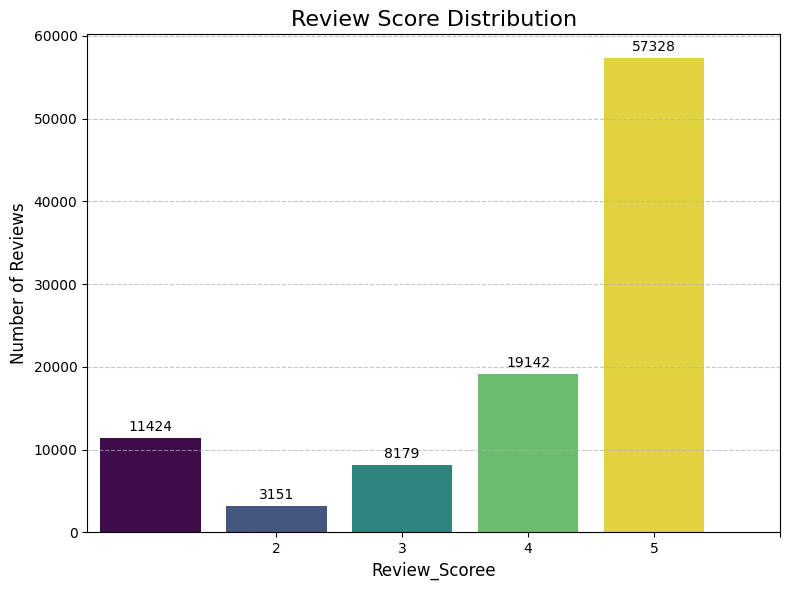

In [29]:
review_scores = order_reviews_df["review_score"].value_counts().reset_index()
review_scores.columns = ["Review_Score", "Count"]

plt.figure(figsize=(8, 6))
bars = sns.barplot(x=review_scores["Review_Score"], y=review_scores["Count"], 
                   data=review_scores, palette='viridis', hue='Review_Score',
                   legend=False)
for container in bars.containers:
    bars.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.title("Review Score Distribution", fontsize=16)
plt.xlabel("Review_Scoree", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(review_scores["Review_Score"], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

*Code* diatas mevisualisasikan jumlah rating ulasan dari seluruh pesanan dengan `value_counts()` terhadap variabel `review_score`

**Insight**
- Distribusi jumlah review cenderung sangat asimetris, dengan mayoritas ulasan berada pada kategori skor tinggi (5 dan 4). Ini mungkin menunjukkan bahwa perusahaan atau e-commerce tersebut memiliki tingkat kepuasan pelanggan yang tinggi, meskipun ada sejumlah kecil ketidakpuasan.
- Meskipun sebagian besar pelanggan memberikan skor tinggi, terdapat sejumlah pelanggan yang memberikan skor rendah. Ini menunjukkan adanya peluang untuk melakukan perbaikan di area yang menyebabkan ketidakpuasan pelanggan, misalnya dengan meningkatkan kualitas produk atau layanan pelanggan.

### Pertanyaan 4: Bagaimana strategi pembayaran tertentu memengaruhi pendapatan, dan apakah kita perlu fokus pada metode pembayaran tertentu?

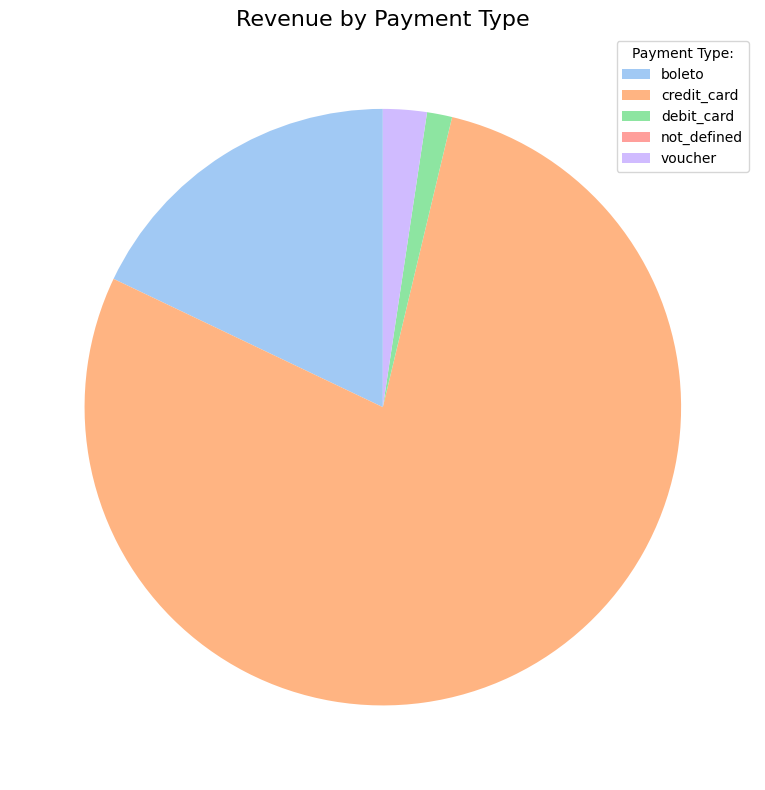

In [ ]:
revenue_by_payment = order_payments_df.groupby("payment_type")["payment_value"].sum().reset_index()

plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")
plt.pie(
    revenue_by_payment["payment_value"],
    labels=None, 
    startangle=90,
    colors=colors
)
plt.legend(labels = revenue_by_payment["payment_type"], title = "Payment Type:")
plt.title("Revenue by Payment Type", fontsize=16)
plt.tight_layout()
plt.show()

*Code* diatas mevisualisasikan piechart kontribusi tipe pemabayaran terhadap total pendapatan dengan mengelompokan  `payment_type` dengan `payment_value` menggunakan `groupby`

**Insight**
- Credit Card adalah metode pembayaran yang menghasilkan pendapatan terbesar, dengan jauh mengungguli metode pembayaran lainnya. Boleto memiliki kontribusi yang signifikan, meskipun tidak sebesar Credit Card. Debit Card dan Voucher memiliki kontribusi yang jauh lebih kecil terhadap pendapatan, sementara Not Defined tidak menyumbang apapun.
- Credit Card sudah menyumbang sebagian besar pendapatan, maka mungkin fokus pada pengoptimalan penggunaan kartu kredit dan peningkatan kenyamanan pengguna dalam menggunakan metode ini akan sangat menguntungkan.
- Boleto juga memiliki kontribusi yang cukup besar, yang menunjukkan bahwa pengguna yang memilih metode ini cukup signifikan. Peningkatan jangkauan pelanggan dapat dilakukan untuk menjangkau pelanggan yang lebih memilih cara pembayaran ini.
- Debit Card dan Voucher memiliki kontribusi yang lebih kecil, tetapi mereka bisa tetap menjadi pilihan yang baik untuk kelompok pelanggan tertentu. Perlu adanya evaluasi terhadap potensi pembayaran ini untuk lebih memperkenalkan atau memperkuat kebijakan yang mendorong penggunaan metode ini.

## Analisis Lanjutan RFM Analysis

In [46]:
orders_df['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

*Code* diatas untuk melihat tanggal terakhir pembelian

In [32]:
current_date = dt.datetime(2018, 10, 17) 

rfm_df = orders_df.merge(order_items_df, on='order_id')
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])
rfm_df = rfm_df.drop_duplicates(subset='order_id')

rfm = rfm_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# customer segmentation
rfm['R_Segment'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1])
bins = [0, 3, 6, 10, float('inf')] 
labels = [1, 2, 3, 4]
rfm['F_Segment'] = pd.cut(rfm['Frequency'], bins=bins, labels=labels, right=True)
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], q=4, labels=[1, 2, 3, 4])

rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)

Kode di atas melakukan analisis RFM menggunakan data pesanan untuk mengelompokkan pelanggan berdasarkan tiga metrik utama: Recency, Frequency, dan Monetary. Berikut adalah penjelasan langkah demi langkah:

1. Inisialisasi Tanggal Referensi
- `current_date = dt.datetime(2018, 10, 17)` menentukan tanggal referensi analisis sebagai 17 Oktober 2018
2. Penggabungan Dataset
- `rfm_df = orders_df.merge(order_items_df, on='order_id')` menggabungkan data pesanan (orders_df) dengan data item pesanan (order_items_df) berdasarkan order_id.
3. Menghitung RFM Metrics 
- `rfm = rfm_df.groupby('customer_id').agg` mengelompokan data berdasarkan customer_id dan hitung metrik RFM:
    - Recency (R): Jumlah hari sejak pembelian terakhir pelanggan (dihitung sebagai selisih antara current_date dan tanggal pembelian terakhir).
    - Frequency (F): Jumlah total pesanan pelanggan (count dari order_id).
    - Monetary (M): Total nilai uang yang dihabiskan pelanggan (sum dari price).
4. Segmentasi RFM
- Segmentasi Recency dan Monetary dilakukan menggunakan `qcut`, yaitu membagi kolom menjadi empat kuartil.
    - Untuk Recency pelanggan yang lebih baru (Recency lebih rendah) mendapatkan nilai lebih tinggi (4), sementara pelanggan lama mendapatkan nilai lebih rendah (1).
    - Untuk Monetary pelanggan dengan pengeluaran lebih tinggi mendapatkan nilai lebih besar (4), dan yang lebih rendah mendapatkan nilai lebih kecil (1).
- Segmentasi Frequency Frequency dilakukan menggunakan teknik `binning`, yaitu membagi kolom Frequency menjadi empat kategori dengan rentang (1) sebagai pelanggan dengan sedikit pesanan (0-3 pesanan), hingga (4) sebagai pelanggan dengan pesanan yang sangat tinggi (>10 pesanan).

In [38]:
def categorize_rfm(row):
    """
    Mengkategorikan pelanggan berdasarkan segmen RFM.
    """
    recency = int(row['R_Segment'])
    frequency = int(row['F_Segment'])
    monetary = int(row['M_Segment'])

    # Champions: Pelanggan dengan nilai terbaik di semua segmen
    if recency == 4 and frequency == 4 and monetary == 4:
        return 'Champions'
    
    # Loyal Customers: Sering belanja, tetapi tidak selalu baru
    elif recency >= 3 and frequency >= 3:
        return 'Loyal Customers'
    
    # Potential Loyalists: Baru mulai menunjukkan potensi kesetiaan
    elif recency >= 3 and frequency >= 2:
        return 'Potential Loyalists'
    
    # New Customers: Pelanggan baru yang memiliki nilai Recency tinggi
    elif recency == 4 and frequency <= 2:
        return 'New Customers'
    
    # Promising: Pelanggan dengan potensi tinggi, tetapi belum sering berbelanja
    elif recency >= 3 and frequency == 1:
        return 'Promising'
    
    # Need Attention: Pelanggan yang pernah aktif tetapi sekarang jarang belanja
    elif recency == 2 and frequency >= 2:
        return 'Need Attention'
    
    # About to Sleep: Pelanggan yang hampir berhenti belanja
    elif recency == 2 and frequency == 1:
        return 'About to Sleep'
    
    # Can't Lose: Pelanggan dengan nilai tinggi yang hampir tidak aktif
    elif recency == 1 and (frequency >= 3 or monetary >= 3):
        return 'Can\'t Lose'
    
    # At Risk: Pelanggan yang pernah aktif tetapi sekarang jarang belanja
    elif recency == 1 and frequency >= 2:
        return 'At Risk'
    
    # Hibernating: Pelanggan yang hampir tidak aktif dengan nilai rendah
    else:
        return 'Hibernating'

def categorize_recency(row):
    """
    Mengkategorikan pelanggan Monetary.
    """
    recency = row['R_Segment']

    if recency == 1:
        return 'Low'
    elif recency == 2:
        return 'Medium'
    elif recency == 3:
        return 'Hight'
    else:
        return 'Very Hight'

def categorize_monetory(row):
    """
    Mengkategorikan pelanggan Monetary.
    """
    monetory = row['M_Segment']

    if monetory == 1:
        return 'Low'
    elif monetory == 2:
        return 'Medium'
    elif monetory == 3:
        return 'Hight'
    else:
        return 'Very Hight'

def categorize_frequency(row):
    """
    Mengkategorikan pelanggan Monetary.
    """
    frequency = row['F_Segment']

    if frequency == 1:
        return 'Low'
    elif frequency == 2:
        return 'Medium'
    elif frequency == 3:
        return 'Hight'
    else:
        return 'Very Hight'

rfm['Recency_Category'] = rfm.apply(categorize_recency, axis=1)
rfm['Frequency_Category'] = rfm.apply(categorize_frequency, axis=1)
rfm['Monetary_Category'] = rfm.apply(categorize_monetory, axis=1)
rfm['Customer_Category'] = rfm.apply(categorize_rfm, axis=1)

Kode di atas bertujuan untuk mengelompokkan pelanggan ke dalam kategori RFM (Recency, Frequency, Monetary) dan kategori pelanggan berdasarkan skor RFM.
1. Fungsi `categorize_rfm` 
- Tujuan: Mengelompokkan pelanggan berdasarkan kombinasi skor RFM.
- Logika Utama:
    - Setiap pelanggan dinilai berdasarkan nilai Recency (R_Segment), Frequency (F_Segment), dan Monetary (M_Segment).
    - Pelanggan dengan kombinasi nilai terbaik mendapatkan kategori Champions.
    - Kategori lain seperti Loyal Customers, Potential Loyalists, dan Hibernating diberikan berdasarkan pola belanja dan loyalitas mereka.
- Contoh:
    - Pelanggan dengan R_Segment=4, F_Segment=4, dan M_Segment=4 dianggap Champions.
    - Pelanggan dengan R_Segment=3 dan F_Segment=2 dianggap Potential Loyalists.
2. Fungsi `categorize_recency`, `categorize_monetory` dan `categorize_frequency`
- Tujuan: Mengkategorikan nilai Recency, Monetory dan Frequency pelanggan ke dalam:
    - 1: Low
    - 2: Medium
    - 3: High
    - 4: Very High
- Hasil: Menambahkan kolom kategori masing masing RFM untuk setiap pelanggan.

In [39]:
rfm

customer_id  Recency  Frequency  Monetary  \
0      00012a2ce6f8dcda20d059ce98491703      336          1     89.80   
1      000161a058600d5901f007fab4c27140      457          1     54.90   
2      0001fd6190edaaf884bcaf3d49edf079      595          1    179.99   
3      0002414f95344307404f0ace7a26f1d5      426          1    149.90   
4      000379cdec625522490c315e70c7a9fb      197          1     93.00   
...                                 ...      ...        ...       ...   
98661  fffcb937e9dd47a13f05ecb8290f4d3e      213          1     78.00   
98662  fffecc9f79fd8c764f843e9951b11341      201          1     54.90   
98663  fffeda5b6d849fbd39689bb92087f431      147          1     47.90   
98664  ffff42319e9b2d713724ae527742af25      125          1    199.90   
98665  ffffa3172527f765de70084a7e53aae8      409          1     10.90   

      R_Segment F_Segment M_Segment  RFM_Score Recency_Category  \
0             2         1         3          6           Medium   
1             1         1         2          4              Low   
2             1         1         4          6              Low   
3             1         1         4          6              Low   
4             3         1         3          7            Hight   
...         ...       ...       ...        ...              ...   
98661         3         1         2          6            Hight   
98662         3         1         2          6            Hight   
98663         4         1         2          7       Very Hight   
98664         4         1         4          9       Very Hight   
98665         1         1         1          3              Low   

      Frequency_Category Monetary_Category Customer_Category  
0                    Low             Hight    About to Sleep  
1                    Low            Medium       Hibernating  
2                    Low        Very Hight        Can't Lose  
3                    Low        Very Hight        Can't Lose  
4                    Low             Hight         Promising  
...                  ...               ...               ...  
98661                Low            Medium         Promising  
98662                Low            Medium         Promising  
98663                Low            Medium     New Customers  
98664                Low        Very Hight     New Customers  
98665                Low               Low       Hibernating  

[98666 rows x 12 columns]

In [40]:
fig_recency = px.histogram(rfm, x="Recency", title="Recency Distribution", nbins=20, 
                           labels={"Recency": "Recency (Days)"}, color_discrete_sequence=["#636EFA"])
fig_recency.update_layout(template="plotly_white")
fig_recency.show()

*Code* diatas mevisualisasikan histogram distribusi recency pembelian dari hasil data RFM 

**Insight**
- Histogram menunjukkan bahwa mayoritas pelanggan memiliki recency rendah hingga sedang (sekitar 0–300 hari), yang berarti banyak pelanggan masih cukup aktif.
- Setelah sekitar 400 hari, jumlah pelanggan menurun secara bertahap. Ini menunjukkan bahwa semakin lama pelanggan tidak bertransaksi, semakin kecil jumlahnya. Terdapat outlier di sekitar 700+ hari, yang mewakili sejumlah kecil pelanggan yang sudah sangat lama tidak bertransaksi.

In [41]:
fig_monetary_bins = px.pie(rfm, names="Monetary_Category", title="Customer Distribution by Monetary Bins",
                           color_discrete_sequence=px.colors.qualitative.Pastel)
fig_monetary_bins.show()

*Code* diatas mevisualisasikan piechart distribusi monetary pembelian dari hasil data RFM 

**Insight**
- Piechart menunjukkan bahwa kategori pengeluaran pelanggan seimbang sekitar 25%.
- Kategori low menunjukan pelanggan dengan pengeluaran kecil, kategori Medium, High, Very High menunjukan pelanggan dengan pengeluaran yang semakin besar.
- Kategori Medium dan High berpotensi untuk ditingkatkan menjadi kategori Very High dengan memberikan promosi yang lebih menarik, program loyalitas, atau rekomendasi produk yang sesuai dengan pola pembelian mereka.

In [42]:
customer_category_counts = rfm['Customer_Category'].value_counts().reset_index()
customer_category_counts.columns = ['Customer_Category', 'Count']  # Ganti nama kolom

fig_customer_category = px.bar(customer_category_counts,
                                x='Customer_Category', y='Count',
                                title="Customer Segmentation Based on RFM",
                                labels={'Customer_Category': 'Customer Category', 'Count': 'Count'},
                                color='Customer_Category', 
                                color_discrete_sequence=px.colors.qualitative.Set2, text='Count')

fig_customer_category.update_layout(template="plotly_white", 
                                     xaxis_title="Customer Category", 
                                     yaxis_title="Count")
fig_customer_category.show()

*Code* diatas mevisualisasikan barchart segmentasi pelanggan terhadap skor RFM.

**Insight**
1. New Customers (24,885 pelanggan):
- Pelanggan yang baru melakukan pembelian. Mereka memiliki Recency yang tinggi (baru-baru ini melakukan transaksi), namun frekuensi dan nilai pembelanjaan (monetary) mereka masih rendah.
- Strategi: Berikan pengalaman yang baik sejak awal, seperti diskon selamat datang, personalisasi produk, atau kampanye promosi untuk mendorong pembelian berulang.

2. About to Sleep (24,695 pelanggan):
- Pelanggan yang pernah aktif tetapi menunjukkan tanda-tanda penurunan aktivitas. Mereka memiliki Recency dan Frequency yang rendah.
- Strategi: Cegah mereka menjadi pelanggan yang tidak aktif dengan memberikan insentif seperti pengingat melalui email, penawaran eksklusif, atau program loyalitas untuk mengaktifkan kembali mereka.

3. Promising (24,621 pelanggan):
- Pelanggan dengan potensi tinggi yang baru mulai berbelanja (Recency tinggi), namun belum cukup sering melakukan pembelian (Frequency rendah).
- Strategi: Dorong mereka menjadi pelanggan yang lebih loyal dengan menawarkan promosi yang relevan, merekomendasikan produk sesuai dengan histori pembelian mereka, dan memberikan pengalaman belanja yang mudah.

4. Hibernating (12,497 pelanggan):
- Pelanggan yang sudah tidak aktif dalam waktu yang lama dengan Recency, Frequency, dan Monetary yang rendah.
- Strategi: Fokuskan upaya minimal pada segmen ini. Jika memungkinkan, buat kampanye reaktivasi yang hemat biaya, seperti email yang menawarkan diskon besar untuk mengundang mereka kembali.

5. Can't Lose (11,968 pelanggan):
- Pelanggan bernilai tinggi (Monetary atau Frequency tinggi), tetapi jarang melakukan pembelian belakangan ini (Recency rendah).
- Strategi: Prioritaskan segmen ini dengan pendekatan personal seperti diskon eksklusif, pengingat tentang produk favorit mereka, atau komunikasi langsung untuk menunjukkan bahwa mereka adalah pelanggan penting. Fokuskan pada membangun kembali hubungan dan mencegah churn.

6. Kesimpulan Umum
- Mayoritas pelanggan berada di segmen New Customers, About to Sleep, dan Promising, yang menunjukkan peluang besar untuk mendorong mereka menjadi pelanggan yang lebih loyal. Upaya khusus juga perlu diberikan pada segmen Can't Lose untuk mencegah kehilangan pelanggan bernilai tinggi. Segmen Hibernating bisa menjadi prioritas terakhir karena potensi mereka lebih kecil dibandingkan segmen lainnya.

## Conclusion

- Pendapatan menunjukkan tren pertumbuhan positif dari September 2016 hingga akhir 2017, dengan puncak pada Oktober 2017 yang kemungkinan dipengaruhi oleh promosi atau event musiman, namun mulai mengalami fluktuasi dan penurunan signifikan setelah Agustus 2018, yang mungkin terkait dengan faktor musiman atau perubahan strategi bisnis.
- Produk dan kategori yang memberikan kontribusi terbesar pada pendapatan adalah sebagai berikut:
    - Produk: Produk dengan ID bb50f2e236e5eea0100680137654686c menghasilkan total pendapatan tertinggi sebesar $63,885.
    - Kategori: Kategori health_beauty menyumbang total pendapatan tertinggi sebesar $1,258,68
- Mayoritas ulasan pelanggan memiliki skor tinggi (4 dan 5), menunjukkan tingkat kepuasan yang tinggi terhadap perusahaan atau e-commerce. Namun, adanya ulasan dengan skor rendah mengindikasikan peluang perbaikan, seperti peningkatan kualitas produk atau layanan pelanggan untuk mengurangi ketidakpuasan.
- Credit Card menjadi metode pembayaran dengan kontribusi terbesar terhadap pendapatan, diikuti oleh Boleto yang juga signifikan, meskipun lebih kecil. Debit Card dan Voucher memiliki kontribusi yang lebih kecil, namun tetap relevan untuk kelompok pelanggan tertentu. Fokus dapat diberikan pada pengoptimalan penggunaan Credit Card dan peningkatan kenyamanan penggunanya, sementara Boleto bisa dijadikan fokus untuk memperluas jangkauan pelanggan. Evaluasi lebih lanjut juga diperlukan untuk meningkatkan penggunaan Debit Card dan Voucher.
- Dari analisis segmentasi pelanggan menggunakan RFM, mayoritas pelanggan berada di segmen New Customers, About to Sleep, dan Promising, yang menunjukkan potensi besar untuk meningkatkan loyalitas. Untuk New Customers, strategi diskon 'selamat datang' dan personalisasi produk dapat meningkatkan pembelian berulang. Segmen About to Sleep memerlukan insentif seperti pengingat atau program loyalitas agar tetap aktif. Pelanggan di segmen Promising bisa didorong untuk lebih sering membeli dengan menawarkan promosi relevan dan pengalaman belanja yang mudah. Segmen Can't Lose, meskipun jarang membeli, merupakan pelanggan bernilai tinggi dan memerlukan perhatian khusus untuk mencegah kehilangan mereka, melalui pendekatan personal dan pengingat tentang produk favorit. Sedangkan segmen Hibernating memiliki potensi rendah dan dapat menjadi prioritas terakhir dengan kampanye reaktivasi hemat biaya, seperti diskon besar untuk mengundang mereka kembali.
